In [3]:
#  Ebnable HTML/CSS 
from __future__ import print_function
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here (double click to edit):

- Name 1: Jose Torres
- Name 2: Shon Mohsin
- Name 3: Bhuvana A K

# In Class Assignment One
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook)  before the end of class (or right after class). The initial portion of this notebook is given before class and the remainder is given during class. Please answer the initial questions before class. Once class has started you may rework your answers as a team for the initial part of the assignment. 

<a id="top"></a>
## Contents
* <a href="#Loading">Loading the Data</a>
* <a href="#linearnumpy">Linear Regression</a>
* <a href="#sklearn">Using Scikit Learn for Regression</a>
* <a href="#classification">Linear Classification</a>

________________________________________________________________________________________________________

<a id="Loading"></a>
<a href="#top">Back to Top</a>
## Loading the Data
Please run the following code to read in the "diabetes" dataset from sklearn's data loading module. 

This will load the data into the variable `ds`. `ds` is a dictionary object with fields like `ds.data`, which is a matrix of the continuous features in the dataset. The object is not a pandas dataframe. It is a numpy matrix. Each row is a set of observed instances, each column is a different feature. It also has a field called `ds.target` that is a continuous value we are trying to predict. Each entry in `ds.target` is a label for each row of the `ds.data` matrix. 

In [151]:
from sklearn.datasets import load_diabetes
import numpy as np

ds = load_diabetes()

# this holds the continuous feature data
# because ds.data is a matrix, there are some special properties we can access (like 'shape')
print('features shape:', ds.data.shape, 'format is:', ('rows','columns')) # there are 442 instances and 10 features per instance
print('range of target:', np.min(ds.target),np.max(ds.target))

features shape: (442, 10) format is: ('rows', 'columns')
range of target: 25.0 346.0


In [152]:
from pprint import pprint

# we can set the fields inside of ds and set them to new variables in python
pprint(ds.data) # prints out elements of the matrix
pprint(ds.target) # prints the vector (all 442 items)

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])
array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37

In [8]:
print(ds.DESCR)
print(ds.feature_names)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

________________________________________________________________________________________________________
<a id="linearnumpy"></a>
<a href="#top">Back to Top</a>
## Using Linear Regression 
In the videos, we derived the formula for calculating the optimal values of the regression weights (you must be connected to the internet for this equation to show up properly):

$$ w = (X^TX)^{-1}X^Ty $$

where $X$ is the matrix of values with a bias column of ones appended onto it. For the diabetes dataset one could construct this $X$ matrix by stacking a column of ones onto the `ds.data` matrix. 

$$ X=\begin{bmatrix}
         & \vdots &        &  1 \\
        \dotsb & \text{ds.data} & \dotsb &  \vdots\\
         & \vdots &         &  1\\
     \end{bmatrix}
$$

**Question 1:** For the diabetes dataset, how many elements will the vector $w$ contain?

In [153]:
from numpy.linalg import inv

#create a matrix with column values 1x1 = 
x1 = np.ones((442,1))

# create final x matrix append ds.data to x1 matrixxDat 
matrixData = np.hstack((ds.data, x1))

print('There are {} elements in w'.format(matrixData.shape[1]))

There are 11 elements in w


________________________________________________________________________________________________________

**Exercise 1:** In the following empty cell, use this equation and numpy matrix operations to find the values of the vector $w$. You will need to be sure $X$ and $y$ are created like the instructor talked about in the video. Don't forget to include any modifications to $X$ to account for the bias term in $w$. You might be interested in the following functions:

- `np.hstack((mat1,mat2))` stack two matrices horizontally, to create a new matrix
- `np.ones((rows,cols))` create a matrix full of ones
- `my_mat.T` takes transpose of numpy matrix named `my_mat`
- `np.dot(mat1,mat2)` is matrix multiplication for two matrices
- `np.linalg.inv(mat)` gets the inverse of the variable `mat`

In [154]:
# Write you code here, print the values of the regression weights using the 'print()' function in python

#compute w
w = np.dot((np.dot((inv(np.dot(matrixData.T, matrixData))), matrixData.T)), ds.target)

print(w)

[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639
  152.13348416]



___
<a id="sklearn"></a>
<a href="#top">Back to Top</a>
# Start of Live Session Coding

**Exercise 2:** Scikit-learn also has a linear regression fitting implementation. Look at the scikit learn API and learn to use the linear regression method. The API is here: 

- API Reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Use the sklearn `LinearRegression` module to check your results from the previous question. 

**Question 2**: Did you get the same parameters? 

In [155]:
from sklearn.linear_model import LinearRegression

# write your code here, print the values of model by accessing 
#    its properties that you looked up from the API

lm = LinearRegression()
y = ds.target
fit = lm.fit(matrixData, y)

print('model coefficients are: {}'.format(fit.coef_))
print('model intercept is', fit.intercept_)
print('Answer to question is', 'Yes')

model coefficients are: [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639
    0.        ]
model intercept is 152.1334841628965
Answer to question is Yes


________________________________________________________________________________________________________

Recall that to predict the output from our model, $\hat{y}$, from $w$ and $X$ we need to use the following formula:

- $\hat{y}=w^TX^T$

Where $X$ is a matrix with example instances in *each row* of the matrix. 

**Exercise 3:** 
- *Part A:* Use matrix multiplication to predict output using numpy, $\hat{y}_{numpy}$ and also using the sklearn regression object, $\hat{y}_{sklearn}$.
 - **Note**: you may need to make the regression weights a column vector using the following code: `w = w.reshape((len(w),1))` This assumes your weights vector is assigned to the variable named `w`.
- *Part B:* Calculate the mean squared error between your prediction from numpy and the target, $\sum_i(y-\hat{y}_{numpy})^2$. 
- *Part C:* Calculate the mean squared error between your sklearn prediction and the target, $\sum_i(y-\hat{y}_{sklearn})^2$.

In [156]:
# Use this block to answer the questions
w = w.reshape((len(w),1))
yhat_numpy =  np.dot(w.T,matrixData.T)
yhat_sklearn = lm.predict(matrixData)

#print('MSE Sklearn is:', np.dot((y-yhat_sklearn).reshape(-1),(y-yhat_sklearn).reshape(-1)) / yhat_numpy.shape[1])
#print('MSE Numpy is:', np.dot((y-yhat_numpy).reshape(-1),(y-yhat_numpy).reshape(-1)) / yhat_numpy.shape[1])

________________________________________________________________________________________________________
<a id="classification"></a>
<a href="#top">Back to Top</a>
## Using Linear Classification
Now lets use the code you created to make a classifier with linear boundaries. Run the following code in order to load the iris dataset.

In [52]:
from sklearn.datasets import load_iris
import numpy as np

# this will overwrite the diabetes dataset
ds_iris = load_iris()
print('features shape:', ds_iris.data.shape) # there are 150 instances and 4 features per instance
print('original number of classes:', len(np.unique(ds_iris.target)))

# now let's make this a binary classification task
ds_iris.target = ds_iris.target>1
print ('new number of classes:', len(np.unique(ds_iris.target)))

features shape: (150, 4)
original number of classes: 3
new number of classes: 2


________________________________________________________________________________________________________

**Exercise 4:** Now use linear regression to come up with a set of weights, `w`, that predict the class value. This is exactly like you did before for the *diabetes* dataset. However, instead of regressing to continuous values, you are just regressing to the integer value of the class (0 or 1), like we talked about in the video. Remember to account for the bias term when constructing the feature matrix, `X`. Print the weights of the linear classifier.

In [57]:
# write your code here and print the values of the weights 

#create a matrix with column values 1x1 = 
x1 = np.ones((150,1))

# create final x matrix append ds.data to x1 matrixxDat 
matrixData = np.hstack((ds_iris.data, x1))


#compute w
w = np.dot((np.dot((inv(np.dot(matrixData.T, matrixData))), matrixData.T)), ds_iris.target)

print(w)

[-0.04587608  0.20276839  0.00398791  0.55177932 -0.69528186]


________________________________________________________________________________________________________

**Exercise 5:** Finally, use a hard decision function on the output of the linear regression to make this a binary classifier. This is just like we talked about in the video, where the output of the linear regression passes through a function: 

- $\hat{y}=g(w^TX^T)$ where
 - $g(w^TX^T)$ for $w^TX^T < \alpha$ maps the predicted class to `0` 
 - $g(w^TX^T)$ for $w^TX^T \geq \alpha$ maps the predicted class to `1`. 

Here, alpha is a threshold for deciding the class. 

**Question 3**: What value for $\alpha$ makes the most sense? What is the accuracy of the classifier given the $\alpha$ you chose? 

Note: You can calculate the accuracy with the following code: `accuracy = float(sum(yhat==y)) / len(y)` assuming you choose variable names `y` and `yhat` for the target and prediction, respectively.

In [146]:
# use this box to predict the classification output
import pandas as pd

#predicted class
def g(weights, data, alpha):
    return np.dot(w,matrixData.T) >= alpha

def accuracy(y, yhat):
    return float(sum(yhat==y)) / len(y)

alpha_possible = np.linspace(start=0, stop=1, num=51)

#list of all possible alpha and their accuracies

accuracies = [(a, accuracy(ds_iris.target, g(w, matrixData, a))) for a in alpha_possible]

print('The value of alpha that we chose is the one that maximizes accuracy using the function above.')
print('The value chosen is .52, based on the plot below of accuracy vs alpha')
print('Percentage accuracy: {}%'.format(100* accuracy(ds_iris.target, g(w,matrixData, .52))))

The value of alpha that we chose is the one that maximizes accuracy using the function above.
The value chosen is .52, based on the plot below of accuracy vs alpha
Percentage accuracy: 94.66666666666667%


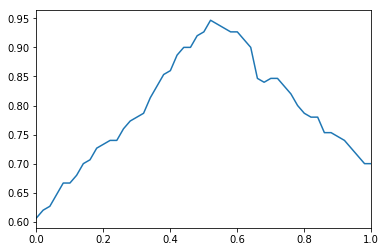

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(accuracies, index=alpha_possible).iloc[:,1].plot(kind='line')

plt.show()

________________________________________________________________________________________________________

That's all! Please **save (make sure you saved!!!) and upload your rendered notebook** and please include **team member names** in the notebook submission.